/data/keeling/a/yulanh/c/OT_output/MODIS_OTinfo_2018316.0350.hdf
316
10
/data/keeling/a/yulanh/c/OT_output/MODIS_OTinfo_2018316.0350.hdf
/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2018/316/MOD021KM.A2018316.0350.061.2018316153334.hdf
lon [-62.85207  -63.05684  -62.80128  -64.55742  -62.594444 -63.002537
 -62.95436  -63.98415  -63.882313 -64.02353 ]
lat [-33.097317 -32.71981  -32.335    -32.678795 -31.646872 -31.280083
 -31.026018 -31.032583 -28.099504 -27.59339 ]
proba [0.9070038  0.9996891  0.88590753 0.99720937 0.89157933 0.9922646
 0.9922686  0.79162043 0.55123025 0.7383533 ]
btd [ 2.58414619  2.2449885   2.81716951  3.760937    3.70482261  4.18645214
 -1.0116923   3.07790261  3.21416281  4.33956876]
otbt [197.8311  194.4263  197.37572 201.28851 193.98737 188.62349 184.90848
 194.26224 192.12485 191.60156]
ci [208.58649 220.2259  211.69334 238.47198 201.95987 198.63231 202.01003
 204.64648 198.23141 199.27986]
tropopause T [203.80792 208.09698 199.93683 203.444

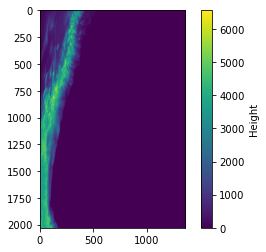

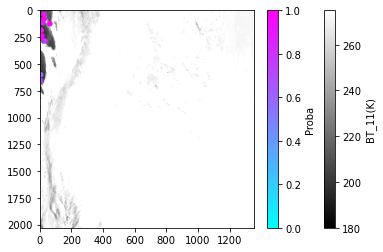

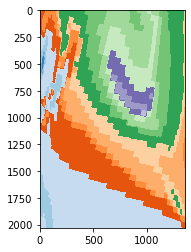

In [4]:
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC

#fnames=glob.glob('/data/keeling/a/yulanh/c/OT_output/MODIS_OTinfo_2018027.1430..hdf') #2018027.1430 case

fnames=glob.glob('/data/keeling/a/yulanh/c/OT_output/MODIS_OTinfo_2018316.0350.hdf')
#fnames=glob.glob('/data/keeling/a/yulanh/c/OT_output/MODIS_OTinfo_2018001.0515.hdf')

planck_c1=1.191042e8
planck_c2=1.4387752e4
    
for fname in fnames:
    print(fname)
    yydayhhmm=fname[48:60]
    Julday=yydayhhmm[4:7]
    print(Julday)
    hdf=SD(fname,SDC.READ)

    #print(hdf.datasets())
    #== read data field ===
    field_name='OT_Flag'
    did=hdf.select(field_name)
    OTflag=did[:,:]
    
    field_name='BT11'
    did=hdf.select(field_name)
    OTbt11=did[:,:]
    
    field_name='BT6.7'
    did=hdf.select(field_name)
    OTbt67=did[:,:]
    
    field_name='Tropopause_T'
    did=hdf.select(field_name)
    Trop_T=did[:,:]
    
    field_name='OT_Probability'
    did=hdf.select(field_name)
    OTproba=did[:,:]
    
    field_name='cirrus_BT'
    did=hdf.select(field_name)
    Ci_BT=did[:,:]
    
    
    nrows, ncols =OTflag.shape
   
    
    print(sum(sum(OTflag)))
    if sum(sum(OTflag)) > 0 :
        print(fname)
        #get mod02 data
        mod02fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2018/'+Julday+'/MOD021KM.A'+yydayhhmm+'*')
        print(mod02fname[0])
        hdf=SD(mod02fname[0],SDC.READ)
        emis_obj=hdf.select('EV_1KM_Emissive')
        emis11=0.0008400219958275557*(emis_obj[10,:,:]-1577.3397216796875)
        bt11=planck_c2/(11.03*np.log(planck_c1/(emis11*11.03**5.0)+1))
        
        #=== read lat and lon
        mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/2018/'+Julday+'/MOD03.A'+yydayhhmm+'*')
        hdf=SD(mod03fname[0],SDC.READ)
        lat=hdf.select('Latitude')
        lat=lat[:,:]
        lon=hdf.select('Longitude')
        lon=lon[:,:]
        surf_hgt=hdf.select('Height')
        surf_hgt=surf_hgt[:,:]
        #=== to plot ===
        plt.figure()
        p0=plt.imshow(surf_hgt)
        plt.colorbar(p0,label='Height') 
        
        plt.figure()
        p=plt.imshow(bt11,vmin=180,vmax=275,cmap=plt.get_cmap('gist_gray'),aspect='auto')
       # plt.xlim([0,100])
       # plt.ylim([0,500])
        plt.colorbar(p,label='BT_11(K)')   
        index=np.where(OTflag == 1)
        xy=np.array(index)
        x=xy.tolist()
        y=xy.tolist()
        print('lon',lon[x[0],x[1]])
        print('lat',lat[x[0],x[1]])
        colors=OTproba[x[0],x[1]]
        p1=plt.scatter(x[1],x[0],s=20,c=colors,cmap=plt.get_cmap('cool'),vmin=0,vmax=1)
        plt.colorbar(p1,label='Proba') 
        print('proba',OTproba[x[0],x[1]])   
        print('btd',OTbt67[x[0],x[1]]- bt11[x[0],x[1]])
        print('otbt',OTbt11[x[0],x[1]])
        print('ci',Ci_BT[x[0],x[1]])
        print('tropopause T',Trop_T[x[0],x[1]])
        plt.figure()
        p2=plt.imshow(Trop_T,vmin=180,vmax=275,cmap=plt.get_cmap('tab20c'))


 #       break

    

In [ ]:
for key, value in did.attributes().iteritems():
            if key == 'radiance_scale':
                scale=value
            if key == 'radiance_offset':
                offset=value
        emis11=scale[10]*(emiss11-offset[10])
        
        print(emis11[1,1])

0.0
